/tmp/ipykernel_1680513/891148236.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  map_scram2intact[start:start+int(duration[where])] = np.arange(starttime[where], endtime[where])
/tmp/ipykernel_1680513/891148236.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start +=int(duration[where])
/tmp/ipykernel_1680513/891148236.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  durations.append(int(duration[where]))
/tmp/ipykernel_1680513/891148236.py:40: Deprec

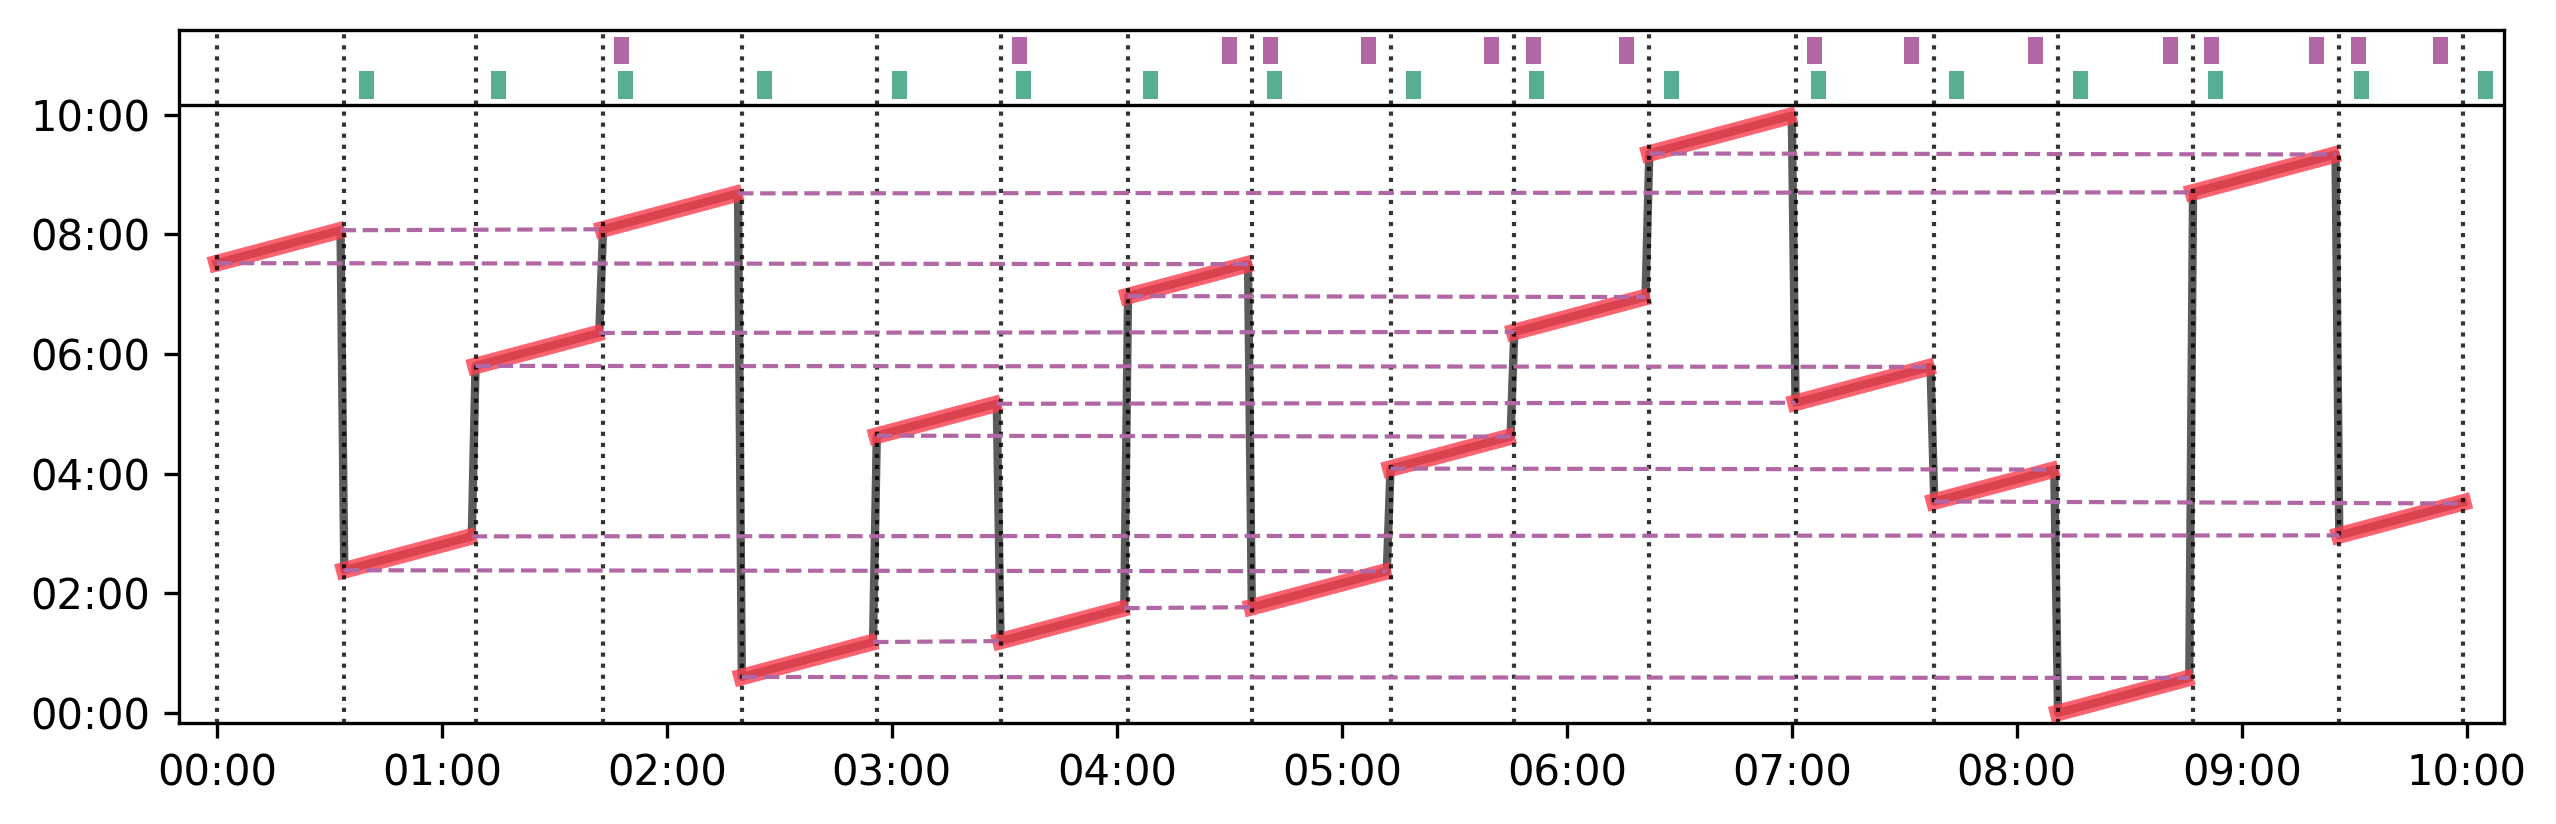

In [1]:
# Supplementary Figure S1 A

import numpy as np
from matplotlib import pyplot as plt

plt.style.use('default')

def scrambled_intact_map():
    order = []
    duration = []
    endtime = []
    with open('utils/event_time.txt','r') as f:
        for line in f:
            line = line.replace('\n','')
            line_split = line.split('\t')

            order.append(int(line_split[0]))
            duration.append( int(line_split[1].split(':')[1])*60 + int(line_split[1].split(':')[2]))
            endtime.append(int(line_split[2].split(':')[1]) * 60 + int(line_split[2].split(':')[2]))

    endtime = np.array(endtime)
    duration = np.array(duration)
    starttime = endtime - duration
    order = np.array(order)

    index = 1
    start = 0
    map_scram2intact = np.zeros(600)
    durations = []
    for i in range(len(order)):
        where = np.where(order == index)[0]
        map_scram2intact[start:start+int(duration[where])] = np.arange(starttime[where], endtime[where])
        start +=int(duration[where])
        index += 1
        durations.append(int(duration[where]))

    map_intact2scram = np.zeros(600)
    for i in range(600):
        where = np.where(map_scram2intact == i)[0]
        map_intact2scram[i] = int(where)
    return map_scram2intact.astype(int), map_intact2scram.astype(int), durations


map_s2i, map_i2s, durations = scrambled_intact_map()

plt.figure(figsize=(10,3), dpi=300)
plt.plot(map_i2s, lw=2, c='#333333', linestyle='-', alpha=0.8)
start = 0
for i in range(1, len(map_i2s)):
    if np.abs(map_i2s[i] - map_i2s[i-1]) == 1:
        pass
    else:
        end = i-1
        plt.plot(np.arange(start, i-1), map_i2s[start:i-1], lw=4, c='#fa3c4c', linestyle='-', alpha=0.8)
        start = i
plt.plot(np.arange(start, 600), map_i2s[start:], lw=4, c='#fa3c4c', linestyle='-', alpha=0.8)
scene_change = np.array([0, 34,  69,  103, 140, 176, 209, 243, 276,
                         313, 346, 382, 421, 458, 491, 527, 566, 599])
for s in scene_change:
    plt.axvline(s, c='k',lw=1, alpha=0.8, linestyle=':')

offset = 0.0
prev_endtimes = []
prev_statimes = [map_i2s[0]]
for t in range(1, 600):
    if t in scene_change:
        plt.axvspan(t+4,  t+8, ymin=0.90+offset, ymax=0.94+offset,  facecolor='#56AE93', alpha=1.0, edgecolor=None, zorder=0)

    if map_i2s[t] - map_i2s[t-1] != 1:
        prev_endtimes.append(map_i2s[t-1])
        prev_statimes.append(map_i2s[t])
        if map_i2s[t]-1 in prev_endtimes:
            link = np.where(np.isin(prev_endtimes, map_i2s[t]-1))[0][0]
            plt.plot([map_s2i[prev_endtimes[link]],  t], [prev_endtimes[link], map_i2s[t]], c='#B067A4', lw=1, linestyle='--')
            plt.axvspan(t+3,  t+7, ymin=0.95+offset, ymax=0.99+offset,  facecolor='#B067A4', alpha=1.0, edgecolor=None, zorder=0)

        if map_i2s[t-1]+1 in prev_statimes:
            link = np.where(np.isin(prev_statimes, map_i2s[t-1]+1))[0][0]
            plt.plot([map_s2i[prev_statimes[link]],  t-1], [prev_statimes[link], map_i2s[t-1]], c='#B067A4', lw=1, linestyle='--')
            plt.axvspan(t-8,  t-4, ymin=0.95+offset, ymax=0.99+offset,  facecolor='#B067A4', alpha=1.0, edgecolor=None, zorder=0)

    if t==599:
        if map_i2s[t]+1 in prev_statimes:
            link = np.where(np.isin(prev_statimes, map_i2s[t]+1))[0][0]
            plt.plot([map_s2i[prev_statimes[link]],  t-1], [prev_statimes[link], map_i2s[t-1]], c='#B067A4', lw=1, linestyle='--')
            plt.axvspan(t-8,  t-4, ymin=0.95+offset, ymax=0.99+offset, facecolor='#B067A4', alpha=1.0, edgecolor=None, zorder=0)

def get_timeformat(seconds):
    m, s = divmod(seconds, 60)
    string = f'{m:02d}:{s:02d}'
    return string

plt.xlim(-10, 610)
plt.ylim(-10, 685)
plt.axhline(610, c='k', lw=0.8)
plt.xticks(np.arange(0,610,60),[get_timeformat(s) for s in np.arange(0,610,60)])
plt.yticks(np.arange(0,610,120),[get_timeformat(s) for s in np.arange(0,610,120)])
plt.show()


In [5]:
# Supplementary Figure S1 B
import numpy as np
import nibabel as nib
from scipy.stats import zscore

subjects =  ['sub-EZ9NM','sub-TV7EF','sub-WLC4O','sub-3L109','sub-3UYSS','sub-JVPPA','sub-EDOP8',
             'sub-TIJD1','sub-AYDLR','sub-98UT7','sub-4G9A5','sub-YJBI8','sub-FG8PD','sub-BBN4K',
             'sub-F61IR','sub-M1ZRL','sub-NZJZN','sub-XZ9SS','sub-L05R3','sub-ZOVPY','sub-6PEOF',
             'sub-G6RPG','sub-TPNCU','sub-9ADGJ','sub-27IXQ','sub-NDX5S','sub-OE7EZ','sub-28E84',
             'sub-ENN9N','sub-28OBV','sub-8WJAP','sub-SPHBN','sub-WP8SX','sub-BG4CW','sub-AVQEZ',
             'sub-YLWD1','sub-0A4MV','sub-8PIML','sub-4T7NM','sub-X5RE0','sub-RUQON','sub-JVT46',
             'sub-RTFX9','sub-OWWAF','sub-IC2KG','sub-S3I4J','sub-XFQA1','sub-UKF5L','sub-Z0MJJ',
             'sub-9HMVR','sub-DBQ8H','sub-NAD3W','sub-KH33B','sub-JASQ6','sub-T6FHZ','sub-PQ8JD',
             'sub-NOVID','sub-XAKBX','sub-JVSIQ','sub-D1FKN','sub-R3JA3','sub-GPMCX','sub-H8QL5',
             'sub-6HW3V','sub-WF939']

# Load subcortical atlas
BN_atlas = nib.load("utils/brain_atlas/BN_fmriprep.nii").get_fdata()
hippocampus_idx = [215, 216, 217, 218]
hippocampus_label = ['rostral-left','rostral-right','caudal-left','caudal-right']

save = False
if save:
    hippocampal_timeseries = np.zeros((len(subjects), 610))
    for s, fname in enumerate(subjects):

        path = f'/DATA/FilmMemory_preprocess/mrbean_scrambled/{fname}_scrambled_smoothing_scale.nii.gz'
        fmri_data = nib.load(path).get_fdata()

        tmp = []
        for roi in hippocampus_idx:
            roi_timeseries = zscore(fmri_data[BN_atlas==roi, :].T, axis=0)
            roi_timeseries = np.nan_to_num(roi_timeseries).mean(axis=1) #610, #voxels
            tmp.append(roi_timeseries)
        hippocampal_timeseries[s,:] = np.mean(tmp, axis=0).astype(np.double)

    np.save(f'_DATA/hippocampal_timeseries.npy', hippocampal_timeseries)
else:
    hippocampal_timeseries = np.load(f'_DATA/hippocampal_timeseries.npy')
print(hippocampal_timeseries.shape) # (65, 610) = (#subjects, #timepoints)

(65, 610)


[False False False False False False False False False False False False
 False False  True  True  True  True False False False]


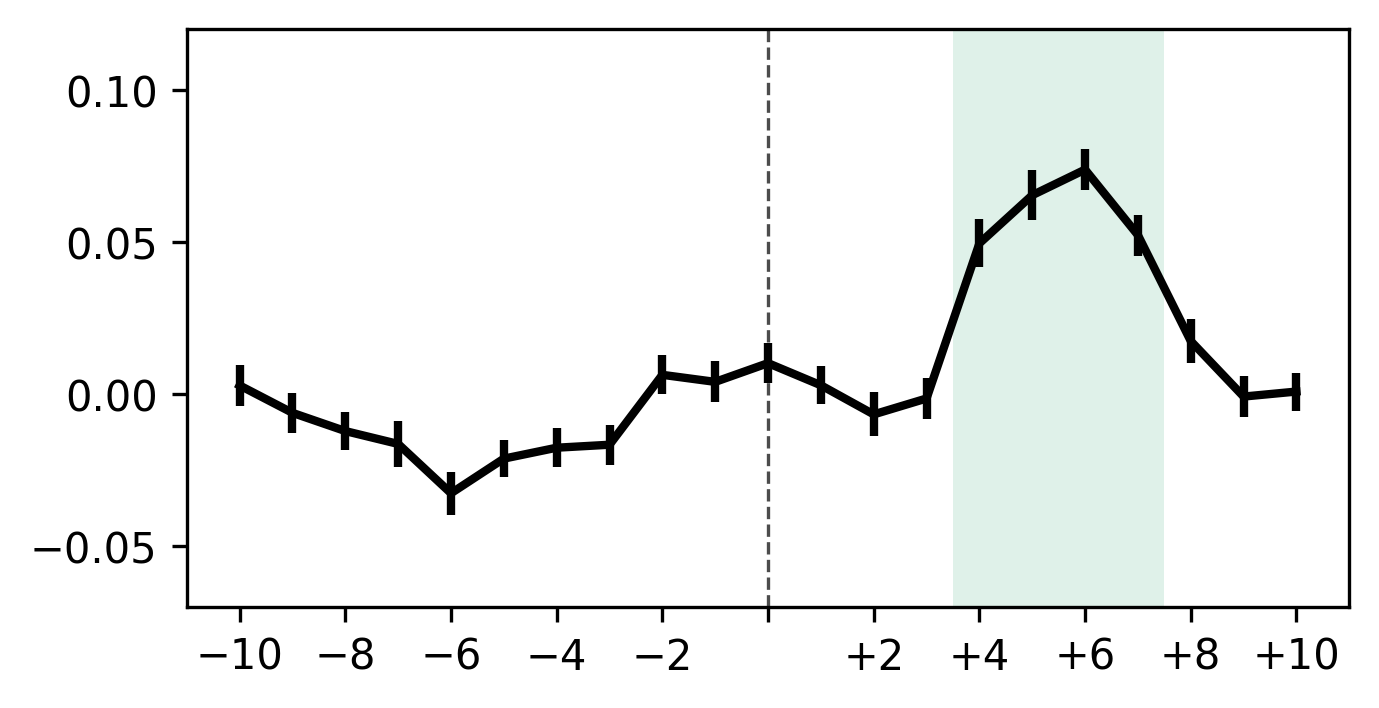

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, sem
from statsmodels.stats.multitest import fdrcorrection
plt.style.use('default')

event_boundaries = [34,  69,  103, 140, 176, 209, 243, 276, 313, 346, 382, 421, 458, 491, 527, 566, 599]

time_window = 10
boundary_activities = []
for s, subject in enumerate(subjects):
    tmp_activity = []
    for e, end in enumerate(event_boundaries):
        tmp_activity.append(hippocampal_timeseries[s, end-time_window:end+time_window+1])
    boundary_activities.append(np.mean(tmp_activity, axis=0))

boundary_activities = np.array(boundary_activities).astype(np.double)
ps = []
for i in range(time_window*2+1):
    t, p = ttest_1samp(boundary_activities[:,i], popmean=0.0,alternative='greater')
    ps.append(p)

iscorrected, p_corrected = fdrcorrection(ps, alpha=0.001)
print(iscorrected)

plt.figure(figsize=(5,2.5), dpi=300)
plt.axvline(x=time_window, c='k', lw=0.8, alpha=0.7, linestyle='--')

plt.errorbar(np.arange(time_window*2+1),
             np.mean(boundary_activities, axis=0),
             yerr=sem(boundary_activities, axis=0),
             c='k', lw=2)
plt.axvspan(time_window+4-0.5,  time_window+7+0.5,  facecolor='#dff1e9', alpha=1.0, zorder=0, edgecolor=None)
plt.ylim(-0.07, 0.12)
plt.xticks(np.arange(0, time_window*2+1, 2),
           ["−10", "−8", "−6", '−4','−2', ' ', '+2', "+4", '+6', "+8", "+10"])
plt.yticks([-0.05, 0.00, 0.05, 0.1])
plt.show()